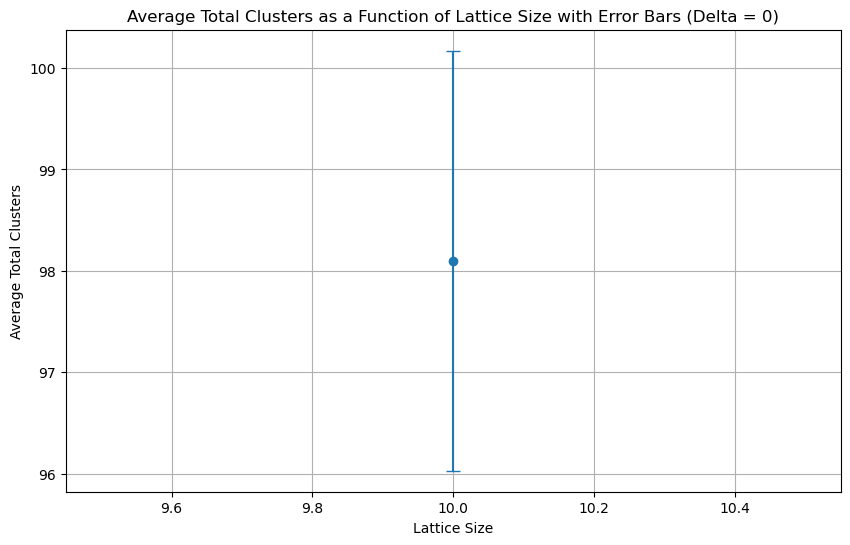

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join

# Directory containing your CSV files
directory = 'csvfiles'

# Read the metadata file
metadata = pd.read_csv(join(directory, 'metadata.csv'), header=None)
metadata.columns = ['Seed', 'GraphType', 'LatticeSize', 'Delta', 'Temperature', 'Trials', 'Subsystems', 'Identifier']

# Filter metadata for runs with delta = 0
filtered_metadata = metadata[metadata['Delta'] == 0]

# Initialize a dictionary to aggregate TotalClusters data
total_clusters_data = {}

# Process each filtered simulation run
for index, row in filtered_metadata.iterrows():
    lattice_size = row['LatticeSize']
    file_identifier = row['Identifier']
    filename = f"{file_identifier}_results.csv"
    
    # Read the results data file
    results_data = pd.read_csv(join(directory, filename))

    # Aggregate the TotalClusters data
    if lattice_size not in total_clusters_data:
        total_clusters_data[lattice_size] = []
    total_clusters_data[lattice_size].append(results_data['TotalClusters'].iloc[0])

# Calculate the average and standard deviation of TotalClusters for each lattice size
average_total_clusters = {size: np.mean(clusters) for size, clusters in total_clusters_data.items()}
std_dev_total_clusters = {size: np.std(clusters) for size, clusters in total_clusters_data.items()}

# Prepare data for plotting
lattice_sizes = list(average_total_clusters.keys())
average_clusters = list(average_total_clusters.values())
std_dev_clusters = [std_dev_total_clusters[size] for size in lattice_sizes]

# Plotting with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(lattice_sizes, average_clusters, yerr=std_dev_clusters, fmt='o', capsize=5)
plt.xlabel('Lattice Size')
plt.ylabel('Average Total Clusters')
plt.title('Average Total Clusters as a Function of Lattice Size with Error Bars (Delta = 0)')
plt.grid(True)
plt.show()